In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [31]:
FILE = '~/GitHub/ci-analysis/travistorrent_11_1_2017.csv.gz'

In [32]:
dataset = pd.read_csv(FILE, sep=',', engine='c',usecols=['gh_team_size',
                                                         'tr_build_id',
                                                         'gh_project_name',
                                                         'tr_build_id',
                                                         'gh_project_name',
                                                         'gh_is_pr',
                                                         'gh_pr_created_at',
                                                         'gh_lang',
                                                         'git_branch',
                                                         'gh_num_commits_in_push',
                                                         'git_prev_commit_resolution_status',
                                                         'tr_prev_build',
                                                         'gh_first_commit_created_at',
                                                         'gh_team_size',         
                                                         'gh_pushed_at',
                                                         'gh_sloc',
                                                         'tr_log_bool_tests_failed',
                                                         'tr_log_setup_time',
                                                         'tr_log_buildduration',
                                                         'tr_status'],dtype={ 'tr_build_id': np.float32,
                                                                                            'gh_project_name': 'category',
                                                                                            'gh_is_pr': np.bool,
                                                                                            'gh_pr_created_at': 'category',
                                                                                            'gh_lang': 'category',
                                                                                            'git_branch': 'category',
                                                                                            'gh_num_commits_in_push': np.float32,
                                                                                            'git_prev_commit_resolution_status': 'category',
                                                                                            'tr_prev_build': np.float32,
                                                                                            'gh_first_commit_created_at': 'category',
                                                                                            'gh_team_size': np.int32,
                                                                                            'gh_pushed_at': 'category',                                                                                           
                                                                                            'gh_sloc': np.int32}, encoding='utf-8')


In [33]:
dataset = dataset.loc[dataset['git_branch'] == 'master']
dataset = dataset[dataset.gh_lang != 'javascript']
dataset = dataset.dropna(subset=['gh_num_commits_in_push']) #Remove NaN da coluna especificada

dataset['gh_pushed_at'] = pd.to_datetime(dataset.gh_pushed_at)

dataset = dataset.drop_duplicates(['tr_build_id']) # No projeto todo


<font size = 4/>
3 - Projeto abaixo de 1000 linhas serão descartados,projeto possuindo acima de 1000 e menos que 10.000 serão considerados pequenos, projetos possuindo acima de 10.000 linhas e menos que 100.000 serão considerados médios e projetos acima de 100.000 linhas serão considerados grandes.

In [11]:
def size_project(language, sett):
    dataset = dataset.sort_values(['gh_sloc'], ascending=False)
    if(sett == 1): #abaixo de 1000 linhas
        df1 = dataset.loc[(dataset['gh_sloc'] < 1000) & (dataset['gh_lang'] == language)]
        ##list_project_df1 = df1.gh_project_name.unique().tolist()
        #print("Projetos {} abaixo de 1000 linhas: {}".format(language, len(list_project_df1)))  
        return(df1)
    if(sett == 2): #acima de 1000 e menos que 10.000
        df2 = dataset.loc[(dataset['gh_sloc'] < 10000)]
        df2 = df2.loc[(df2['gh_sloc'] > 1000) & (df2['gh_lang'] == language)]
        #list_project_df2 = df2.gh_project_name.unique().tolist() #filtra o nome de cada projeto e coloca em uma lista
        
        #print("Projetos {} acima de 1000 linhas e abaixo de 10.000 : {}".format(language,len(list_project_df2)))
        return(df2)
    
    if(sett == 3): #acima de 10.000 linhas e menos que 100.000
        df3 = dataset.loc[(dataset['gh_sloc'] < 100000)]
        df3 = df3.loc[(df3['gh_sloc'] > 10000) & (df3['gh_lang'] == language)]
        #list_project_df3 = df3.gh_project_name.unique().tolist() #filtra o nome de cada projeto e coloca em uma lista
    
        #print("Projetos {} acima de 10.000 linhas e abaixo de 100.000 : {}".format(language,len(list_project_df3)))
        return(df3)
    
    if(sett == 4): #acima de 100.000 linhas
        df4 = dataset.loc[(dataset['gh_sloc'] > 100000) & (dataset['gh_lang'] == language)]
        #list_project_df4 = df4.gh_project_name.unique().tolist() #filtra o nome de cada projeto e coloca em uma lista
    
        #print("Projetos {} acima de 100.000 linhas: {}".format(language,len(list_project_df4)))
        return(df4)        

In [39]:

# modelo parcial, ainda falta retornar um dataset 
def quantidade_projetos_all(language, sett):
    small, medium, large, project_null, very_large = 0,0,0,0,0
    
    df = dataset.sort_values(['gh_sloc'], ascending=False)
    df = df.loc[df['gh_lang'] == language]
    
    list_name_project = df.gh_project_name.unique().tolist()

    if(sett == 1):
        for name in list_name_project:
            df0 = df.loc[df['gh_project_name'] == name]
            if(1000 > df0.gh_sloc[0:1].item()):
                project_null +=1
        print("Projetos {} abaixo de 1000 linhas: {}".format(language, project_null)) 
        
    if(sett == 2):
        for name in list_name_project:
            df1 = df.loc[df['gh_project_name'] == name]
            if((1000 < df1.gh_sloc[0:1].item()) and (10000 > df1.gh_sloc[0:1].item())):
                small +=1
        print("Projetos {} acima de 1000 linhas e abaixo de 10.000 : {}".format(language, small))
        
    if(sett == 3):
        for name in list_name_project:
            df2 = df.loc[df['gh_project_name'] == name]
            if((10000 < df2.gh_sloc[0:1].item()) and (100000 > df2.gh_sloc[0:1].item())):
                medium +=1
        print("Projetos {} acima de 10.000 linhas e abaixo de 100.000 : {}".format(language,medium))
        
    if(sett == 4):
        for name in list_name_project:
            df3 = df.loc[df['gh_project_name'] == name]
            if((100000 < df3.gh_sloc[0:1].item()) and (1000000 > df3.gh_sloc[0:1].item())):
                large +=1
        print("Projetos {} acima de 100.000 linhas e abaixo de 1.000.000: {}".format(language,large))
        
    if(sett == 5):
        for name in list_name_project:
            df4 = df.loc[df['gh_project_name'] == name]
            if(1000000 <= df4.gh_sloc[0:1].item()):
                very_large +=1
        print("Projetos {} acima de 1.000.000 linhas: {}".format(language, very_large))

<font size = 4/>
3.1 Tamanho dos projetos Ruby e Java

In [11]:
# tirar o comentado do metodo para não haver erro
quantidade_projetos_all('ruby', 1)
quantidade_projetos_all('ruby', 2)
quantidade_projetos_all('ruby', 3)
quantidade_projetos_all('ruby', 4)
quantidade_projetos_all('ruby', 5)

print("\n")

quantidade_projetos_all('java', 1)
quantidade_projetos_all('java', 2)
quantidade_projetos_all('java', 3)
quantidade_projetos_all('java', 4)
quantidade_projetos_all('java', 5)

['aws/aws-sdk-java']

<font size = 4/>
Def para frequencia por dia e mes

In [20]:
def weekday_frequency(dataframe): #year
    
    dataframe = dataframe.gh_pushed_at.dt.weekday

    monday  = []
    tuesday  = []
    wednesday = []
    thursday  = []
    friday = []
    saturday = []
    sunday = []

    for date in dataframe:
        if(date == 0):
            monday.append(date)
        elif(date == 1):
            tuesday.append(date)
        elif(date == 2):
            wednesday.append(date)
        elif(date == 3):
            thursday.append(date)
        elif(date == 4):
            friday.append(date)
        elif(date == 5):
            saturday.append(date)
        elif(date == 6):
            sunday.append(date)
            
    #print("\nMonday: {} commits \n Tuesday: {} \n wednesday: {} \n Thursday: {} \n Friday: {} \n Saturday: {}\n Sunday: {}".format(len(monday), len(tuesday), len(wednesday), len(thursday), len(friday), len(saturday), len(sunday)))
      
    return([monday, tuesday, wednesday, thursday, friday, saturday, sunday])

In [14]:
def month_frequency(dataframe): #year
    #dataframe = dataframe.loc[dataset.gh_pushed_at.dt.year == year]

    dataframe = dataframe.gh_pushed_at.dt.month
    
    january = []
    february = []
    march = []
    april = []
    may = []
    june = []
    july = []
    august = []
    september = []
    october = []
    november = []
    december = []
    
 
    for month in dataframe:
        if(month == 1):
            january.append(month)
        elif(month == 2):
            february.append(month)
        elif(month == 3):
            march.append(month)
        elif(month == 4):
            april.append(month)
        elif(month == 5):
            may.append(month)
        elif(month == 6):
            june.append(month)
        elif(month == 7):
            july.append(month)
        elif(month == 8):
            august.append(month)
        elif(month == 9):
            september.append(month)
        elif(month == 10):
            october.append(month)
        elif(month == 11):
            november.append(month)
        elif(month == 12):
            december.append(month)
            
    #print("january:{} \n february:{} \n march:{} \n april:{} \n may:{} \n june:{} \n july:{} \n august:{} \n september:{} \n october:{} \n november:{} \n december:{} ".format(len(january), len(february), len(march), len(april), len(may), len(june), len(july), len(august), len(september), len(october), len(november), len(december)))
    return([january, february, march, april, may, june, july, august, september, october, november, december])

In [42]:
def plot_bar(sett, language, very_small,low, medium, high):
    
    # Dados do grafico
    if(sett == 0):
        frequency_low = [len(low[0]),len(low[1]),len(low[2]),len(low[3]),len(low[4]),len(low[5]),len(low[6]),len(low[7]),len(low[8]),len(low[9]),len(low[10]),len(low[11])]
        frequency_medium = [len(medium[0]),len(medium[1]),len(medium[2]),len(medium[3]),len(medium[4]),len(medium[5]),len(medium[6]),len(medium[7]),len(medium[8]),len(medium[9]),len(medium[10]),len(medium[11])]
        frequency_high = [len(high[0]),len(high[1]),len(high[2]),len(high[3]),len(high[4]),len(high[5]),len(high[6]),len(high[7]),len(high[8]),len(high[9]),len(high[10]),len(high[11])]

        labels_list = ["january", "february", "march", "april", "may", "june", "july", "august", "september", "october", "november", "december"]
    if(sett == 1):
        frequency_very_small = [len(very_small[0]),len(very_small[1]),len(very_small[2]),len(very_small[3]),len(very_small[4]),len(very_small[5]),len(very_small[6])]
        frequency_low = [len(low[0]),len(low[1]),len(low[2]),len(low[3]),len(low[4]),len(low[5]),len(low[6])]
        frequency_medium = [len(medium[0]),len(medium[1]),len(medium[2]),len(medium[3]),len(medium[4]),len(medium[5]),len(medium[6])]
        frequency_high = [len(high[0]),len(high[1]),len(high[2]),len(high[3]),len(high[4]),len(high[5]),len(high[6])]

        labels_list = ['Monday', 'Tuesday','wednesday','thursday ','friday','saturday','sunday']
        
    # Largura das barras
    barWidth = 0.20
    
    # Tamanho do Grafico
    plt.figure(figsize=(10,9))
    
    # Posicao da barras
    r1 = np.arange(len(frequency_very_small))
    r2 = [x + barWidth for x in r1]
    r3 = [x + barWidth for x in r2]
    r4 = [x + barWidth for x in r3]
    
    
    # Criando as barras
    plt.bar(r1, frequency_very_small, color='#59C3CD', width=barWidth, label='Very Small')
    plt.bar(r2, frequency_low, color='#808080', width=barWidth, label='Small')
    plt.bar(r3, frequency_medium, color='#EEF9FA', width=barWidth, label='Medium')
    plt.bar(r4, frequency_high, color='#000000', width=barWidth, label='Large')
    
    # Adicionando legendas as barras
    if(sett == 0):
        plt.xlabel('Months', fontsize=15)
    if(sett == 1):
        plt.xlabel('Weekday', fontsize=15)
   
    plt.xticks([r + barWidth for r in  range(len(frequency_low))], labels_list)
    plt.ylabel('Quantity of commits', fontsize=15)
    plt.title('{}'.format(language), fontsize=15)
    
    
    plt.legend()
    plt.savefig('frequencia_por_dia_semana.eps', format='eps')
    plt.show()
  

<font size = 4/>
3.2 - Frequências de commit por Mês, sendo projetos de tamanho pequeno, médio e grande.

### All project

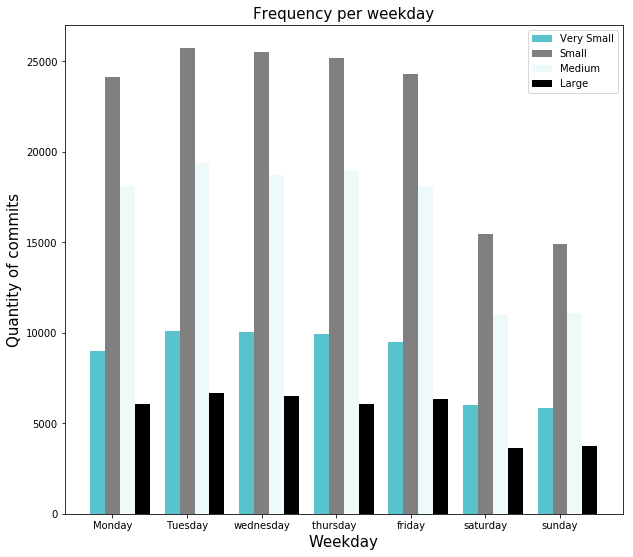

In [43]:
def project(sett):
    #dataset = dataset.sort_values(['gh_sloc'], ascending=False)
    if(sett == 1): #abaixo de 1000 linhas
        df1 = dataset.loc[dataset['gh_sloc'] < 1000]
        return(df1)
    
    if(sett == 2): #acima de 1000 e menos que 10.000
        df2 = dataset.loc[dataset['gh_sloc'] < 10000]
        df2 = df2.loc[df2['gh_sloc'] > 1000]
        return(df2)
    
    if(sett == 3): #acima de 10.000 linhas e menos que 100.000
        df3 = dataset.loc[dataset['gh_sloc'] < 100000]
        df3 = df3.loc[df3['gh_sloc'] > 10000]
        return(df3)
    
    if(sett == 4): #acima de 100.000 linhas
        df4 = dataset.loc[dataset['gh_sloc'] > 100000]
        return(df4)        
    
df_very_small = project(1)

df_small = project(2)

df_medium = project(3)

df_large = project(4)


weekday_very_small = weekday_frequency(df_very_small)
weekday_small = weekday_frequency(df_small)
weekday_medium = weekday_frequency(df_medium)
weekday_large = weekday_frequency(df_large)

plot_bar(1, 'Frequency per weekday', weekday_very_small, weekday_small, weekday_medium, weekday_large)

<font size = 4/>
3.2.1 - Projetos RUBY 

In [31]:
dataframe_l = size_project('ruby', 2)

dataframe_m = size_project('ruby', 3)

dataframe_h = size_project('ruby', 4)


weekday_low = weekday_frequency(dataframe_l)
weekday_medium = weekday_frequency(dataframe_m)
weekday_high = weekday_frequency(dataframe_h)

plot_bar(1, 'Ruby', weekday_low, weekday_medium, weekday_high)

NameError: name 'size_project' is not defined

<font size = 4/>
3.2.1 - Projetos Java 

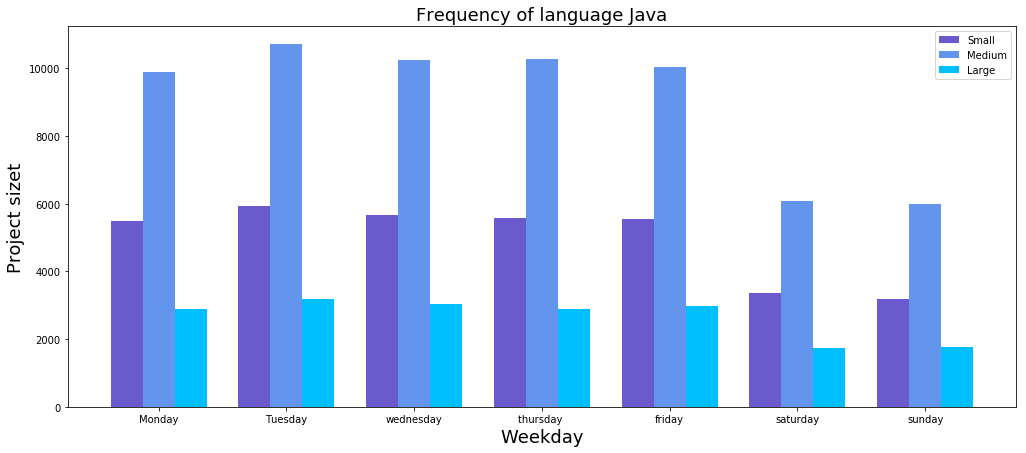

In [10]:
dataframe_l = size_project('java', 2)

dataframe_m = size_project('java', 3)

dataframe_h = size_project('java', 4)



weekday_low = weekday_frequency(dataframe_l)
weekday_medium = weekday_frequency(dataframe_m)
weekday_high = weekday_frequency(dataframe_h)

plot_bar(1, 'Java', weekday_low, weekday_medium, weekday_high)

<font size = 4/>
3.3 - Frequências de commit por Mês, por tamanho do projeto, pequeno, médio e grande.


<font size = 4/>
3.3.1 - Projetos RUBY 

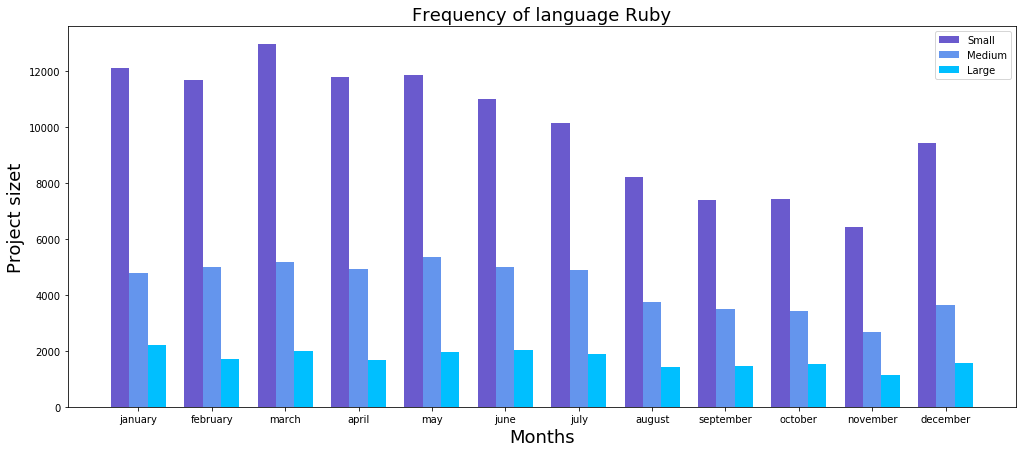

In [11]:
dataframe_l = size_project('ruby', 2)
dataframe_m = size_project('ruby', 3)
dataframe_h = size_project('ruby', 4)

month_low = month_frequency(dataframe_l)
month_medium = month_frequency(dataframe_m)
month_high = month_frequency(dataframe_h)

#plot_bar(0, 'Ruby', month_low, month_medium, month_high)

<font size = 4/>
3.3.2 - Projetos Java 

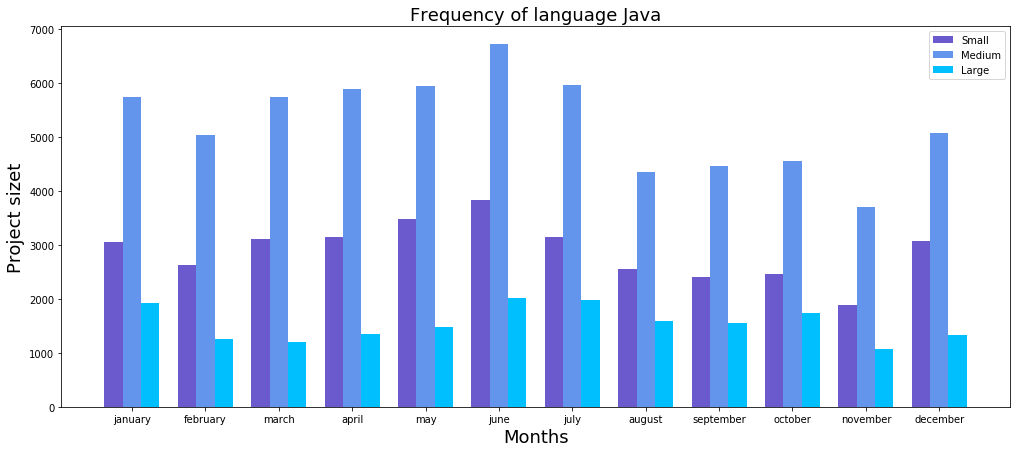

In [12]:
dataframe_l = size_project('java', 2)
dataframe_m = size_project('java', 3)
dataframe_h = size_project('java', 4)

month_low = month_frequency(dataframe_l)
month_medium = month_frequency(dataframe_m)
month_high = month_frequency(dataframe_h)

#plot_bar(0, 'Java', month_low, month_medium, month_high)

<font size = 4/>
4 - Boxplot por semana e por mês

In [13]:
def plot_box(title, plot1, plot2, plot3=None, plot4=None, plot5=None, plot6=None, plot7=None, plot8=None, plot9=None, plot10=None, plot11=None, plot12=None):
    
    if(plot8 == None):
        data=[plot1, plot2, plot3, plot4, plot5, plot6, plot7]
    else:
        data=[plot1, plot2, plot3, plot4, plot5, plot6, plot7, plot8, plot9, plot10, plot11, plot12]
        
    fig, ax = plt.subplots()
    fig.subplots_adjust(left=0.08, right=1.48, bottom=0.05, top=1.2,
                        hspace=0.4, wspace=0.3)

    ax.set_axisbelow(True)
    ax.set_title(title, size=20)
    ax.boxplot(data)

In [14]:
def commits_weekday(dataframe):
    weekday = [] 
    for i in range(0, 7):
        day = dataframe.loc[(dataframe.gh_pushed_at.dt.weekday == i)]
        weekday.append(day.gh_num_commits_in_push)
    return(weekday)

In [63]:

dataframe_l = size_project('ruby', 2)
dataframe_m = size_project('ruby', 3)
dataframe_h = size_project('ruby', 4)


weekday_l = commits_weekday(dataframe_l)
weekday_m = commits_weekday(dataframe_m)
weekday_h = commits_weekday(dataframe_h)


Projetos ruby acima de 1000 linhas e abaixo de 10.000 : 471
Projetos ruby acima de 10.000 linhas e abaixo de 100.000 : 76
Projetos ruby acima de 100.000 linhas: 8


NameError: name 'commits_weekday' is not defined

In [16]:
# Media de commits para projetos

dia_semana_p = dataframe_l.loc[(dataframe_l.gh_pushed_at.dt.weekday < 5)]
dia_semana_m = dataframe_m.loc[(dataframe_m.gh_pushed_at.dt.weekday < 5)]
dia_semana_h = dataframe_h.loc[(dataframe_h.gh_pushed_at.dt.weekday < 5)]


print('Media para projetos pequenos\n',dia_semana_p.gh_num_commits_in_push.describe()[0:3])
print('\nMedia para projetos medios\n',dia_semana_m.gh_num_commits_in_push.describe()[0:3])
print('\nMedia para projetos grandes\n',dia_semana_h.gh_num_commits_in_push.describe()[0:3])


fim_semana_p = dataframe_l.loc[(dataframe_l.gh_pushed_at.dt.weekday >= 5)]
fim_semana_m = dataframe_m.loc[(dataframe_m.gh_pushed_at.dt.weekday >= 5)]
fim_semana_h = dataframe_h.loc[(dataframe_h.gh_pushed_at.dt.weekday >= 5)]

print('\n\nMedia para projetos pequenos fim de semana\n',fim_semana_p.gh_num_commits_in_push.describe()[0:3])
print('\nMedia para projetos medios fim de semana\n',fim_semana_m.gh_num_commits_in_push.describe()[0:3])
print('\nMedia para projetos grandes fim de semana\n',fim_semana_h.gh_num_commits_in_push.describe()[0:3])

#weekend1, weekend2 = commits_weekend(dataframe_m)
#weekend1, weekend2 = commits_weekend(dataframe_h)

Media para projetos pequenos
 count    96682.000000
mean         2.381281
std          2.658886
Name: gh_num_commits_in_push, dtype: float64

Media para projetos medios
 count    42129.000000
mean         2.417195
std          2.727777
Name: gh_num_commits_in_push, dtype: float64

Media para projetos grandes
 count    16707.000000
mean         3.406476
std          3.751727
Name: gh_num_commits_in_push, dtype: float64


Media para projetos pequenos fim de semana
 count    23794.000000
mean         2.337144
std          2.611799
Name: gh_num_commits_in_push, dtype: float64

Media para projetos medios fim de semana
 count    10045.000000
mean         2.431458
std          2.865199
Name: gh_num_commits_in_push, dtype: float64

Media para projetos grandes fim de semana
 count    3895.000000
mean        3.424390
std         3.711321
Name: gh_num_commits_in_push, dtype: float64


In [17]:
#plot_box('Projetos ruby pequenos - Semana', weekday_l[0], weekday_l[1], weekday_l[2], weekday_l[3], weekday_l[4], weekday_l[5], weekday_l[6])
#plot_box('Projetos ruby médios - Semana', weekday_m[0], weekday_m[1], weekday_m[2], weekday_m[3], weekday_m[4], weekday_m[5], weekday_m[6])
#plot_box('Projetos ruby grandes - Semana', weekday_h[0], weekday_h[1], weekday_h[2], weekday_h[3], weekday_h[4], weekday_h[5], weekday_h[6])

In [18]:
# size project filtra os projetos por tamanho e depois filtra-se por cada dia da semana 
dataframe_l = size_project('java', 2)
dataframe_m = size_project('java', 3)
dataframe_h = size_project('java', 4)


weekday_l = commits_weekday(dataframe_l)
weekday_m = commits_weekday(dataframe_m)
weekday_h = commits_weekday(dataframe_h)


#plot_box('Projetos Java pequenos - Semana', weekday_l[0], weekday_l[1], weekday_l[2], weekday_l[3], weekday_l[4], weekday_l[5], weekday_l[6])
#plot_box('Projetos Java médios - Semana', weekday_m[0], weekday_m[1], weekday_m[2], weekday_m[3], weekday_m[4], weekday_m[5], weekday_m[6])
#plot_box('Projetos Java grandes - Semana', weekday_h[0], weekday_h[1], weekday_h[2], weekday_h[3], weekday_h[4], weekday_h[5], weekday_h[6])

### quantidade de projetos com ao menos um commit por semana

In [34]:


list_n = []
for i in range(0, 7):
    df_s = dataset.loc[dataset.gh_pushed_at.dt.weekday == i]
    df_s = df_s.loc[df_s['gh_num_commits_in_push'] == 1]
    list_n.append(df_s.gh_project_name.unique().tolist())

new_list = []  
for i in range(len(list_n)):
    new_list = new_list + list_n[i]

week = pd.DataFrame(data=new_list, columns=['projetos'])

len(week.projetos.unique().tolist())


1242

### quantidade de projetos com ao menos um commit por mes

In [38]:


list_n = []
for i in range(1, 13):
    df_s = dataset.loc[dataset.gh_pushed_at.dt.weekday == i]
    df_s = df_s.loc[df_s['gh_num_commits_in_push'] == 1]
    list_n.append(df_s.gh_project_name.unique().tolist())

new_list = []  
for i in range(len(list_n)):
    new_list = new_list + list_n[i]

week = pd.DataFrame(data=new_list, columns=['projetos'])

len(week.projetos.unique().tolist())


1240

#### (size project) filtra os projetos por tamanho e depois filtra-se por dia de semana e final de semana

In [19]:


dia_semana_p = dataframe_l.loc[(dataframe_l.gh_pushed_at.dt.weekday < 5)]
dia_semana_m = dataframe_m.loc[(dataframe_m.gh_pushed_at.dt.weekday < 5)]
dia_semana_h = dataframe_h.loc[(dataframe_h.gh_pushed_at.dt.weekday < 5)]


print('Media para projetos pequenos\n',dia_semana_p.gh_num_commits_in_push.describe()[0:3])
print('\nMedia para projetos medios\n',dia_semana_m.gh_num_commits_in_push.describe()[0:3])
print('\nMedia para projetos grandes\n',dia_semana_h.gh_num_commits_in_push.describe()[0:3])


fim_semana_p = dataframe_l.loc[(dataframe_l.gh_pushed_at.dt.weekday >= 5)]
fim_semana_m = dataframe_m.loc[(dataframe_m.gh_pushed_at.dt.weekday >= 5)]
fim_semana_h = dataframe_h.loc[(dataframe_h.gh_pushed_at.dt.weekday >= 5)]

print('\n\nMedia para projetos pequenos fim de semana\n',fim_semana_p.gh_num_commits_in_push.describe()[0:3])
print('\nMedia para projetos medios fim de semana\n',fim_semana_m.gh_num_commits_in_push.describe()[0:3])
print('\nMedia para projetos grandes fim de semana\n',fim_semana_h.gh_num_commits_in_push.describe()[0:3])


Media para projetos pequenos
 count    28219.000000
mean         2.143485
std          2.481595
Name: gh_num_commits_in_push, dtype: float64

Media para projetos medios
 count    51132.000000
mean         2.261754
std          2.761387
Name: gh_num_commits_in_push, dtype: float64

Media para projetos grandes
 count    14992.000000
mean         2.367929
std          2.840215
Name: gh_num_commits_in_push, dtype: float64


Media para projetos pequenos fim de semana
 count    6549.000000
mean        2.182318
std         2.611190
Name: gh_num_commits_in_push, dtype: float64

Media para projetos medios fim de semana
 count    12088.000000
mean         2.217075
std          2.660982
Name: gh_num_commits_in_push, dtype: float64

Media para projetos grandes fim de semana
 count    3483.000000
mean        2.295435
std         2.771428
Name: gh_num_commits_in_push, dtype: float64


### Dados dos projetos Pequenos, Medios e Grandes

In [13]:
#abaixo de 1000
df_very_small = dataset.loc[(dataset['gh_sloc'] < 1000)]

#acima de 1000 e menos que 10.000
df_small = dataset.loc[(dataset['gh_sloc'] < 10000)]
df_small = df_small.loc[(df_small['gh_sloc'] > 1000)]

#acima de 10.000 linhas e menos que 100.000
df_medium = dataset.loc[(dataset['gh_sloc'] < 100000)]
df_medium = df_medium.loc[(df_medium['gh_sloc'] > 10000)]

#acima de 100.000 linhas e menos que 1.000.000
df_large = dataset.loc[(dataset['gh_sloc'] > 100000)]
df_large = df_large.loc[df_large['gh_sloc'] < 1000000]

df_very_large = dataset.loc[dataset['gh_sloc'] > 1000000]

print("\n\nMédia e desvio padrão dos projetos muito pequenos\n", df_very_small.gh_num_commits_in_push.describe(),"\nmedian:", df_very_small.gh_num_commits_in_push.median())
print("\n\nMédia e desvio padrão dos projetos pequenos\n", df_small.gh_num_commits_in_push.describe(), "\nmedian:", df_small.gh_num_commits_in_push.median())
print("\n\nMédia e desvio padrão dos projetos medios\n", df_medium.gh_num_commits_in_push.describe(), "\nmedian:",df_medium.gh_num_commits_in_push.median())
print("\n\nMédia e desvio padrão dos projetos grandes\n", df_large.gh_num_commits_in_push.describe(), "\nmedian:",df_large.gh_num_commits_in_push.median())
print("\n\nMédia e desvio padrão dos projetos muito grandes\n", df_very_large.gh_num_commits_in_push.describe(), "\nmedian:",df_very_large.gh_num_commits_in_push.median())



Média e desvio padrão dos projetos muito pequenos
 count    60471.000000
mean         2.139621
std          2.152579
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max         20.000000
Name: gh_num_commits_in_push, dtype: float64 
median: 2.0


Média e desvio padrão dos projetos pequenos
 count    155246.000000
mean          2.322991
std           2.620459
min           1.000000
25%           1.000000
50%           2.000000
75%           2.000000
max          20.000000
Name: gh_num_commits_in_push, dtype: float64 
median: 2.0


Média e desvio padrão dos projetos medios
 count    115398.000000
mean          2.328576
std           2.748486
min           1.000000
25%           1.000000
50%           2.000000
75%           2.000000
max          20.000000
Name: gh_num_commits_in_push, dtype: float64 
median: 2.0


Média e desvio padrão dos projetos grandes
 count    39028.000000
mean         2.911038
std          3.385264
min          1.000000
25%

#### Media geral de commits

In [59]:
dataset.gh_num_commits_in_push.mean()

2.356738805770874

#### Quantidade de projetos abaixo da media(commits infrequentes)

In [62]:
cont=0

list_name = dataset.gh_project_name.unique().tolist()

for i in range(len(list_name)):

    df = dataset.loc[dataset['gh_project_name'] == list_name[i]]

    mean = df.gh_num_commits_in_push.mean()

    if(mean < 2.36):
        cont +=1

        
print("Total de projetos {} | Projetos com media a baixo de 2: {} ".format(len(list_name), cont))



Total de projetos 1255 | Projetos com media a baixo de 2: 748 


#### describe de projetos java

In [17]:
df = dataset.loc[dataset['gh_lang'] == 'java']

#abaixo de 1000
df_very_small = df.loc[(df['gh_sloc'] < 1000)]

#acima de 1000 e menos que 10.000
df_small = df.loc[(df['gh_sloc'] < 10000)]
df_small = df_small.loc[(df_small['gh_sloc'] > 1000)]

#acima de 10.000 linhas e menos que 100.000
df_medium = df.loc[(df['gh_sloc'] < 100000)]
df_medium = df_medium.loc[(df_medium['gh_sloc'] > 10000)]

#acima de 100.000 linhas e menor que 1.000.000
df_large = df.loc[(df['gh_sloc'] > 100000)]
df_large = df_large.loc[df_large['gh_sloc'] < 1000000]

#acima de 1.000.000
df_very_large = df.loc[df['gh_sloc'] > 1000000]

print("\n\nMédia e desvio padrão dos projetos muito pequenos\n", df_very_small.gh_num_commits_in_push.describe(),"\nmedian:", df_very_small.gh_num_commits_in_push.median())
print("\n\nMédia e desvio padrão dos projetos pequenos\n", df_small.gh_num_commits_in_push.describe(), "\nmedian:", df_small.gh_num_commits_in_push.median())
print("\n\nMédia e desvio padrão dos projetos medios\n", df_medium.gh_num_commits_in_push.describe(), "\nmedian:",df_medium.gh_num_commits_in_push.median())
print("\n\nMédia e desvio padrão dos projetos grandes\n", df_large.gh_num_commits_in_push.describe(), "\nmedia:",df_large.gh_num_commits_in_push.median())
print("\n\nMédia e desvio padrão dos projetos muito grandes\n", df_very_large.gh_num_commits_in_push.describe(), "\nmedian:",df_very_large.gh_num_commits_in_push.median())



Média e desvio padrão dos projetos muito pequenos
 count    2573.000000
mean        1.684415
std         1.832164
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        20.000000
Name: gh_num_commits_in_push, dtype: float64 
median: 1.0


Média e desvio padrão dos projetos pequenos
 count    34768.000000
mean         2.150800
std          2.506641
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         20.000000
Name: gh_num_commits_in_push, dtype: float64 
median: 1.0


Média e desvio padrão dos projetos medios
 count    63221.000000
mean         2.253207
std          2.742345
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         20.000000
Name: gh_num_commits_in_push, dtype: float64 
median: 1.0


Média e desvio padrão dos projetos grandes
 count    18425.000000
mean         2.353324
std          2.829810
min          1.000000
25%          1.000000
50%  

#### describe de projetos ruby

In [18]:
df = dataset.loc[dataset['gh_lang'] == 'ruby']

#abaixo de 1000
df_very_small = df.loc[(df['gh_sloc'] < 1000)]

#acima de 1000 e menos que 10.000
df_small = df.loc[(df['gh_sloc'] < 10000)]
df_small = df_small.loc[(df_small['gh_sloc'] > 1000)]

#acima de 10.000 linhas e menos que 100.000
df_medium = df.loc[(df['gh_sloc'] < 100000)]
df_medium = df_medium.loc[(df_medium['gh_sloc'] > 10000)]

#acima de 100.000 linhas e menor que 1.000.000
df_large = df.loc[(df['gh_sloc'] > 100000)]
df_large = df_large.loc[df_large['gh_sloc'] < 1000000]

#acima de 1.000.000
df_very_large = df.loc[df['gh_sloc'] > 1000000]

print("\n\nMédia e desvio padrão dos projetos muito pequenos\n", df_very_small.gh_num_commits_in_push.describe(),"\nmedian:", df_very_small.gh_num_commits_in_push.median())
print("\n\nMédia e desvio padrão dos projetos pequenos\n", df_small.gh_num_commits_in_push.describe(), "\nmedian:", df_small.gh_num_commits_in_push.median())
print("\n\nMédia e desvio padrão dos projetos medios\n", df_medium.gh_num_commits_in_push.describe(), "\nmedian:",df_medium.gh_num_commits_in_push.median())
print("\n\nMédia e desvio padrão dos projetos grandes\n", df_large.gh_num_commits_in_push.describe(), "\nmedia:",df_large.gh_num_commits_in_push.median())
print("\n\nMédia e desvio padrão dos projetos muito grandes\n", df_very_large.gh_num_commits_in_push.describe(), "\nmedian:",df_very_large.gh_num_commits_in_push.median())



Média e desvio padrão dos projetos muito pequenos
 count    57898.00000
mean         2.15985
std          2.16377
min          1.00000
25%          1.00000
50%          2.00000
75%          2.00000
max         20.00000
Name: gh_num_commits_in_push, dtype: float64 
median: 2.0


Média e desvio padrão dos projetos pequenos
 count    120478.000000
mean          2.372682
std           2.648688
min           1.000000
25%           1.000000
50%           2.000000
75%           2.000000
max          20.000000
Name: gh_num_commits_in_push, dtype: float64 
median: 2.0


Média e desvio padrão dos projetos medios
 count    52177.000000
mean         2.419898
std          2.755023
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max         20.000000
Name: gh_num_commits_in_push, dtype: float64 
median: 2.0


Média e desvio padrão dos projetos grandes
 count    20603.000000
mean         3.409795
std          3.743885
min          1.000000
25%          1.0000

#### Plot de projetos java frequencia de commits

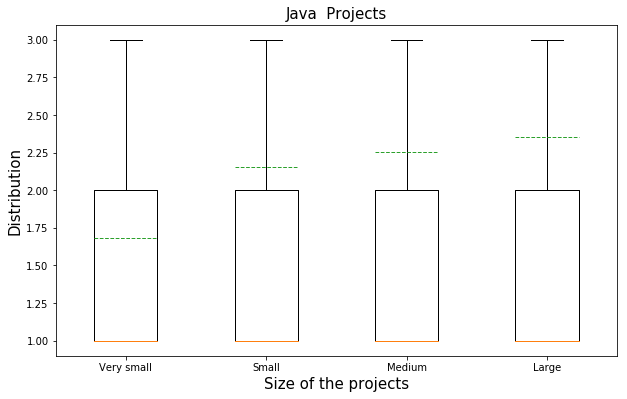

In [13]:
#abaixo de 1000
df = dataset.loc[dataset['gh_lang'] == 'java']
df = df.sort_values(['gh_sloc'], ascending=False)

df_very_small = df.loc[(df['gh_sloc'] < 1000)]

very_small = df_very_small.gh_num_commits_in_push.tolist()

#acima de 1000 e menos que 10.000
df_small = df.loc[(df['gh_sloc'] < 10000)]
df_small = df_small.loc[(df_small['gh_sloc'] > 1000)]

small = df_small.gh_num_commits_in_push.tolist()

#acima de 10.000 linhas e menos que 100.000
df_medium = df.loc[(df['gh_sloc'] < 100000)]
df_medium = df_medium.loc[(df_medium['gh_sloc'] > 10000)]

medium = df_medium.gh_num_commits_in_push.tolist()

#acima de 100.000 linhas
df_large = df.loc[(df['gh_sloc'] > 100000)]

large = df_large.gh_num_commits_in_push.tolist()



###### plot bar #######
data=[very_small, small, medium, large]

fig, ax = plt.subplots()

fig.subplots_adjust(left=0.08, right=1.38, bottom=0.05, top=1.2, hspace=0.4, wspace=0.3)
#fig.subplots_adjust(left=0.15, right=.98, bottom=0.22, top=.9, hspace=0.6, wspace=0.6)

ax.set_title('Java  Projects', fontsize=15)
ax.set_xlabel('Size of the projects', fontsize=15)
ax.set_ylabel('Distribution', fontsize=15)

ax.set_axisbelow(True)


#ax.boxplot(data, 0, '', showmeans=True, meanline=True, labels=['Very small', 'Small', 'Medium', 'Large']) # boxplot sem outlier points


plt.savefig('size_project_java.eps', format='eps', dpi = 300,  bbox_inches='tight')
plt.show()

#### describe de projetos ruby

In [33]:
#### describe de projetos ruby

df = dataset.loc[dataset['gh_lang'] == 'ruby']

#abaixo de 1000
df_very_small = df.loc[(dataset['gh_sloc'] < 1000)]

#acima de 1000 e menos que 10.000
df_small = df.loc[(df['gh_sloc'] < 10000)]
df_small = df_small.loc[(df_small['gh_sloc'] > 1000)]

#acima de 10.000 linhas e menos que 100.000
df_medium = df.loc[(df['gh_sloc'] < 100000)]
df_medium = df_medium.loc[(df_medium['gh_sloc'] > 10000)]

#acima de 100.000 linhas
df_large = df.loc[(df['gh_sloc'] > 100000)]

print("\n\nMédia e desvio padrão dos projetos muito pequenos\n", df_very_small.gh_num_commits_in_push.describe(),"\n\n", df_very_small.gh_num_commits_in_push.median())
print("\n\nMédia e desvio padrão dos projetos pequenos\n", df_small.gh_num_commits_in_push.describe(), "\nmedian:", df_small.gh_num_commits_in_push.median())
print("\n\nMédia e desvio padrão dos projetos medios\n", df_medium.gh_num_commits_in_push.describe(), "\nmedian:",df_medium.gh_num_commits_in_push.median())
print("\n\nMédia e desvio padrão dos projetos grandes\n", df_large.gh_num_commits_in_push.describe(), "\nmedia:",df_large.gh_num_commits_in_push.median())



Média e desvio padrão dos projetos muito pequenos
 count    57898.00000
mean         2.15985
std          2.16377
min          1.00000
25%          1.00000
50%          2.00000
75%          2.00000
max         20.00000
Name: gh_num_commits_in_push, dtype: float64 

 2.0


Média e desvio padrão dos projetos pequenos
 count    120478.000000
mean          2.372682
std           2.648688
min           1.000000
25%           1.000000
50%           2.000000
75%           2.000000
max          20.000000
Name: gh_num_commits_in_push, dtype: float64 
median: 2.0


Média e desvio padrão dos projetos medios
 count    52177.000000
mean         2.419898
std          2.755023
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max         20.000000
Name: gh_num_commits_in_push, dtype: float64 
median: 2.0


Média e desvio padrão dos projetos grandes
 count    20603.000000
mean         3.409795
std          3.743885
min          1.000000
25%          1.000000
50%

#### Plot de projetos java frequencia de commits

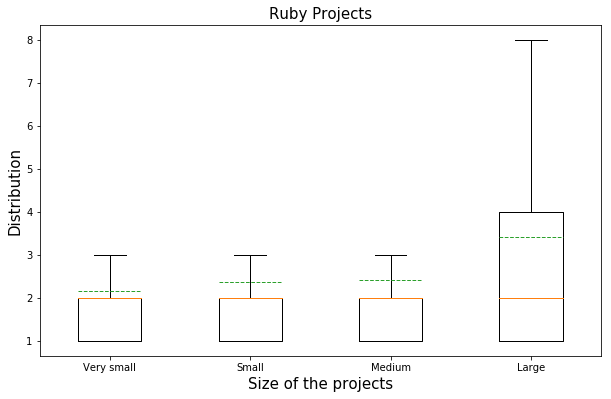

In [17]:
#abaixo de 1000
df = dataset.loc[dataset['gh_lang'] == 'ruby']
df = df.sort_values(['gh_sloc'], ascending=False)

df_very_small = df.loc[(df['gh_sloc'] < 1000)]

very_small = df_very_small.gh_num_commits_in_push.tolist()

#acima de 1000 e menos que 10.000
df_small = df.loc[(df['gh_sloc'] < 10000)]
df_small = df_small.loc[(df_small['gh_sloc'] > 1000)]

small = df_small.gh_num_commits_in_push.tolist()

#acima de 10.000 linhas e menos que 100.000
df_medium = df.loc[(df['gh_sloc'] < 100000)]
df_medium = df_medium.loc[(df_medium['gh_sloc'] > 10000)]

medium = df_medium.gh_num_commits_in_push.tolist()

#acima de 100.000 linhas
df_large = df.loc[(df['gh_sloc'] > 100000)]

large = df_large.gh_num_commits_in_push.tolist()



###### plot bar #######
data=[very_small, small, medium, large]

fig, ax = plt.subplots()

fig.subplots_adjust(left=0.08, right=1.38, bottom=0.05, top=1.2, hspace=0.4, wspace=0.3)
#fig.subplots_adjust(left=0.15, right=.98, bottom=0.22, top=.9, hspace=0.6, wspace=0.6)

ax.set_title('Ruby Projects', fontsize=15)
ax.set_xlabel('Size of the projects', fontsize=15)
ax.set_ylabel('Distribution', fontsize=15)

ax.set_axisbelow(True)


ax.boxplot(data,0,'', showmeans=True, meanline=True, labels=['Very small', 'Small', 'Medium', 'Large']) # boxplot sem outlier points


#plt.savefig('size_project_ruby.eps', format='eps', dpi = 300,  bbox_inches='tight')
plt.show()

# RQ2

### Quantidade de builds por projeto java

In [64]:
df = dataset.loc[dataset['gh_lang'] == 'java']

list_name = df.gh_project_name.unique().tolist()
list_size = []

for i in range(len(list_name)):

    data = df.loc[df['gh_project_name'] == list_name[i]]

    list_size.append(data.tr_build_id.size)

    

df = pd.Series(list_size, index=list_name)
#print(df.sort_values(ascending=False))

### Recebe projetos java que usam coverrals e dps filtra os projetos que possuem build em 2016

In [65]:
# Recebe projetos java que usam coverrals e dps filtra os projetos que possuem build em 2016
FILE = 'data/projetos_java_coverall.csv'
projetos_coverral = pd.read_csv(FILE, sep=',', engine='c')

java_coverral = projetos_coverral.gh_project_name.tolist()

projeto_java = []

print(f"total de projetos java que usam coveralls: {len(java_coverral)}")
for i in range(len(java_coverral)):
    project = dataset.loc[dataset['gh_project_name'] == java_coverral[i]]
    
    if(2016 == int(project.gh_pushed_at.dt.year.sort_values(ascending=False)[0:1])):
        projeto_java.append(java_coverral[i])

print('projetos:\n',projeto_java)
print('\n\nquatidade de projetos 2016: ', len(projeto_java))


#cria um arquivo csv com os dados 
#output = pd.DataFrame(data=projeto_java, columns=['projetos'])
#output.to_csv('output.csv')

total de projetos java que usam coveralls: 100
projetos:
 ['graphhopper/graphhopper', 'sevntu-checkstyle/sevntu.checkstyle', 'searls/jasmine-maven-plugin', 'mybatis/spring', 'undera/jmeter-plugins', 'restlet/restlet-framework-java', 'dropwizard/dropwizard', 'DSpace/DSpace', 'doanduyhai/Achilles', 'rackerlabs/blueflood', 'p6spy/p6spy', 'Unidata/thredds', 'torakiki/pdfsam', 'mockito/mockito', 'FasterXML/jackson-core', 'FasterXML/jackson-annotations', 'FasterXML/jackson-databind', 'jcabi/jcabi-aspects', 'jcabi/jcabi-http', 'jphp-compiler/jphp', 'querydsl/querydsl', 'thatJavaNerd/JRAW', 'igniterealtime/Smack', 'azkaban/azkaban', 'yegor256/rultor', 'lenskit/lenskit', 'TestFX/TestFX', 'iluwatar/java-design-patterns', 'connectbot/connectbot', 'myui/hivemall', 'drewnoakes/metadata-extractor', 'qos-ch/slf4j', 'qos-ch/logback', 'GoogleCloudPlatform/DataflowJavaSDK', 'javaparser/javaparser', 'SonarSource/sonarqube', 'grpc/grpc-java', 'square/keywhiz', 'psi-probe/psi-probe', 'javaslang/javaslang',

### Quantidade de builds por projeto ruby

In [68]:
df = dataset.loc[dataset['gh_lang'] == 'ruby']

list_name = df.gh_project_name.unique().tolist()
list_size = []

for i in range(len(list_name)):

    data = df.loc[df['gh_project_name'] == list_name[i]]

    list_size.append(data.tr_build_id.size)

    

df = pd.Series(list_size, index=list_name)
#df.sort_values(ascending=False)

#cria um arquivo csv com os dados 
#output = pd.DataFrame(data=list_size, index=list_name, columns=['projetos'])
#df.to_csv('output_ruby.csv')

### Recebe projetos ruby que usam coverrals e dps filtra os projetos que possuem build em 2016

In [69]:
# Recebe projetos java que usam coverrals e dps filtra os projetos que possuem build em 2016
FILE = 'data/projetos_ruby_coverall.csv'
projetos_coverral = pd.read_csv(FILE, sep=',', engine='c')


ruby_coverral = projetos_coverral.gh_project_name.tolist()

projeto_ruby = []

print(f"total de projetos ruby que usam coveralls: {len(ruby_coverral)}")

for i in range(len(ruby_coverral)):
    project = dataset.loc[dataset['gh_project_name'] == ruby_coverral[i]]
    
    if(2016 == int(project.gh_pushed_at.dt.year.sort_values(ascending=False)[0:1])):
        projeto_ruby.append(ruby_coverral[i])

print('projetos:\n',projeto_ruby)
print('\n\nquatidade de projetos 2016: ', len(projeto_ruby))


#cria um arquivo csv com os dados 
#output = pd.DataFrame(data=projeto_ruby, columns=['projetos'])
#output.to_csv('output_ruby_filtrado.csv')

total de projetos ruby que usam coveralls: 302
projetos:
 ['presidentbeef/brakeman', 'sferik/rails_admin', 'sferik/sign-in-with-twitter', 'pry/pry', 'intridea/oauth2', 'locomotivecms/engine', 'cheezy/page-object', 'rspec/rspec-core', 'weppos/whois', 'heroku/heroku', 'guard/listen', 'matschaffer/knife-solo', 'ari/jobsworth', 'adhearsion/adhearsion', 'rspec/rspec-mocks', 'mperham/sidekiq', 'twitter/twitter-cldr-rb', 'rodjek/rspec-puppet', 'mroth/lolcommits', 'google/google-api-ruby-client', 'floere/phony', 'shoes/shoes4', 'openSUSE/open-build-service', 'Casecommons/pg_search', 'fog/fog', 'refinery/refinerycms', 'opal/opal', 'savonrb/savon', 'lemurheavy/coveralls-ruby', 'thibaudgg/video_info', 'roidrage/lograge', 'rapid7/metasploit-framework', 'projectblacklight/blacklight', 'rails-api/active_model_serializers', 'savonrb/gyoku', 'diowa/icare', 'phoet/on_ruby', 'puppetlabs/facter', 'twitter/secureheaders', 'expertiza/expertiza', 'dejan/rails_panel', 'saturnflyer/casting', 'nathanl/searchli

### dataset com report do coverrolls - java

In [5]:
File = 'data/projetos_java_coverall_filtrados_2016.csv'

In [6]:
df = pd.read_csv(File, sep=',', engine='c')
df['gh_pushed_at'] = pd.to_datetime(df.gh_pushed_at).dt.date #le a coluna com apenas os dias
df['gh_pushed_at'] = df['gh_pushed_at'].sort_values(ascending=False) #ordena da data mais atual para mais antiga

#df = df.drop_duplicates(['gh_project_name']) #remove duplicados

In [7]:

list_name_cover = df.gh_project_name.unique().tolist() # lista de projetos do dataset

print(len(list_name_cover))

25


### dataset do travis com filtros (Java)

In [8]:
data = dataset.loc[dataset['gh_lang'] == 'java'] #filtra a linguagem do projeto
data = data.loc[data.gh_pushed_at.dt.year == 2016] #filtra o ano do projeto

data['gh_pushed_at'] = pd.to_datetime(data.gh_pushed_at).dt.date #deixa a coluna apenas com as datas

data['gh_pushed_at'] = data['gh_pushed_at'].sort_values(ascending=False)# ordena da data mais atual para mais antiga

In [9]:
"uso um dataset auxiliar para ciar uma lista de projetos que não serão usados"
dataset_aux = data

for i in range(len(list_name_cover)):
    
    dataset_aux = dataset_aux.loc[dataset_aux['gh_project_name'] != list_name_cover[i]]

    
#cria uma lista de projetos para remover
list_remove = dataset_aux.gh_project_name.unique().tolist()

# remove os projetos da lista criada
for i in range(len(list_remove)):
    data = data.loc[data['gh_project_name'] != list_remove[i]]


### dataset com report do coverrolls - Ruby

In [41]:
File = 'data/projetos_ruby_coverall_filtrados_2016.csv'

df = pd.read_csv(File, sep=',', engine='c')
df['gh_pushed_at'] = pd.to_datetime(df.gh_pushed_at).dt.date #le a coluna com apenas os dias
df['gh_pushed_at'] = df['gh_pushed_at'].sort_values(ascending=False) #ordena da data mais atual para mais antiga

#df = df.drop_duplicates(['gh_project_name']) #remove duplicados



list_name_cover = df.gh_project_name.unique().tolist() # lista de projetos do dataset

print(len(list_name_cover))

58


### dataset do travis com filtros (Ruby)

In [42]:
data = dataset.loc[dataset['gh_lang'] == 'ruby'] #filtra a linguagem do projeto
data = data.loc[data.gh_pushed_at.dt.year == 2016] #filtra o ano do projeto

data['gh_pushed_at'] = pd.to_datetime(data.gh_pushed_at).dt.date #deixa a coluna apenas com as datas

data['gh_pushed_at'] = data['gh_pushed_at'].sort_values(ascending=False)# ordena da data mais atual para mais antiga

In [43]:
"uso um dataset auxiliar para ciar uma lista de projetos que não serão usados"
dataset_aux = data

for i in range(len(list_name_cover)):
    
    dataset_aux = dataset_aux.loc[dataset_aux['gh_project_name'] != list_name_cover[i]]

    
#cria uma lista de projetos para remover
list_remove = dataset_aux.gh_project_name.unique().tolist()

# remove os projetos da lista criada
for i in range(len(list_remove)):
    data = data.loc[data['gh_project_name'] != list_remove[i]]


In [45]:
#cria um arquivo csv com os dados 
#data.to_csv('output_ruby_filtrado.csv')

In [10]:
#dataset foi filtrado para os projetos que estão no dataset do leonardo

##### Dataset com merge de df e data

In [11]:
test = pd.merge(data,df, how='left', on = ['gh_project_name', 'gh_pushed_at'],indicator=True)

#test['gh_pushed_at'] = test['gh_pushed_at'].sort_values(ascending=False)

# RQ3

### How common is allowing the build to stay red for long periods?

#### JAVA

In [64]:
# filtra a linguagem e retorna uma lista com o nome dos projetos

df= dataset.loc[dataset['gh_lang'] == 'java']
list_name = df.gh_project_name.unique().tolist()

In [65]:
# cria 2 filtros para builds que passa e não passa

passed = df.loc[df['tr_status'] == 'passed']
failed = df.loc[df['tr_status'] == 'failed']
print('Projetos Java')
print('Total de builds que passaram {}'.format(passed.size))
print('Total de builds que NÃO passaram {}'.format(failed.size))

Projetos Java
Total de builds que passaram 1754498
Total de builds que NÃO passaram 308807


In [66]:
# cria uma lista com a quantidade builds passed e failed 
passed = []
failed = []
for i in range(len(list_name)):
    project = df.loc[df['gh_project_name'] == list_name[i]] 
    _passed = project.loc[project['tr_status'] == 'passed']
    _failed = project.loc[project['tr_status'] == 'failed']
    
    passed.append(_passed.size)
    failed.append(_failed.size)

In [67]:
# apresenta o percentual de failed

teste = pd.Series(failed)

teste.describe()

count      378.000000
mean       816.949735
std       1905.576154
min          0.000000
25%         76.000000
50%        247.000000
75%        684.000000
max      18202.000000
dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x7f5d2bd200f0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f5d2bcac278>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f5d2bd20438>],
 'medians': [<matplotlib.lines.Line2D at 0x7f5d2bcacd68>],
 'fliers': [],
 'means': []}

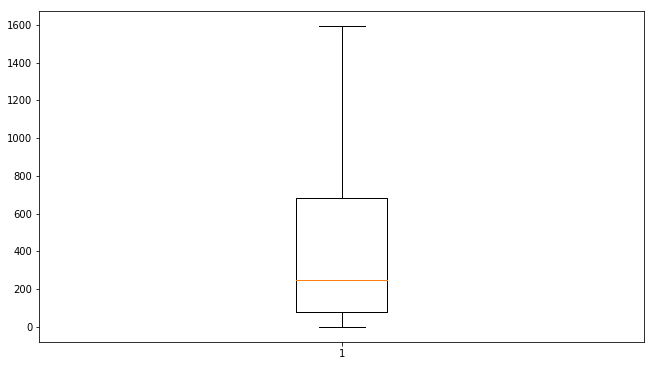

In [70]:
data=failed

fig, ax = plt.subplots()

fig.subplots_adjust(left=0.08, right=1.48, bottom=0.05, top=1.2, hspace=0.4, wspace=0.3)

ax.set_axisbelow(True)
ax.set_title('', size=20)
ax.boxplot(data, 0, '') # boxplot sem outlier points 
plt.show()

/home/wagner/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


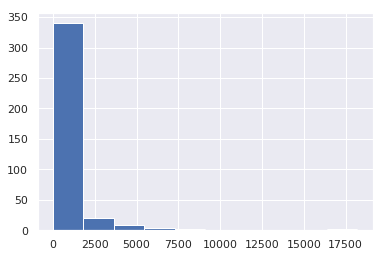

In [39]:
'''
plt.hist(failed, normed=False, bins=10)
plt.ylabel('');
'''

In [28]:
# Não esquecer de ordenar pela data o dataset, visto que está de forma aleatória

In [9]:
def status_build(project_name):
    #filtra o dataset pelo nome do projeto e ordena as datas do dataset
    df = dataset.loc[dataset['gh_project_name'] == project_name]
    
    df = df.sort_values(by='gh_pushed_at', ascending=False)#ordena da data mais atual para mais antiga
    
    df['gh_pushed_at'] = pd.to_datetime(df.gh_pushed_at).dt.date#le a coluna com apenas os dias
    
    date_line = df.gh_pushed_at # cria uma Serie com as datas
    status_build = df.tr_status.tolist() # cria uma lista com os status da build

    
    '''
    cont = 0

    for i in range(len(status_build)):

        if('failed' == status_build[i]):


            print(f'failed: {i} | time: {cont} | {time[i]}')
            cont += 1

        elif('passed' == status_build[i]):

            print(f'passed: {i} | time: {cont} | {time[i]}')
    '''
    
    build_red = []
    sett = 0
    
    for i in range(len(status_build)):

        if("failed" == status_build[i]):
            if(sett == 0):
                index_fail = i
                sett = 1
        if(('passed' == status_build[i]) and (sett == 1)):
                
                #print(f"{project_name} | build: fail:{index_fail} passed:{i} | linha: {i}: days: {date_line.iloc[i]} - {date_line.iloc[index_fail]} | day: {date_line.iloc[index_fail] - date_line.iloc[i]}")
                build_red.append(date_line.iloc[index_fail] - date_line.iloc[i]) # subtrai o dia que a build nao passou ate o dia que passa
                sett = 0

    return(build_red) # retorna uma lista com datas de quando deu fail ate pasar

### ALL PROJECT

In [6]:
list_name = dataset.gh_project_name.unique().tolist() 

print(f"quantidade total de projetos {len(list_name)}")

list_days_broken = []
for i in range(len(list_name)):
    list_days_broken.append(status_build(list_name[i]))

days_broken = []
for j in range(len(list_days_broken)):
    days_broken = days_broken + list_days_broken[j]
    


days = pd.DataFrame(days_broken, columns=['date']) # cria uma

print(days.date.dt.days.describe())



count = 0 
metric = days.date.dt.days.describe()[6] # 3 quartil 

#percorre o vetor quando ele encontra um que é equivalente ao if da break e vai para o proximo vetor que no caso seria outro projeto
for k in range(len(list_days_broken)):
    validate = 0 
    for j in range(len(list_days_broken[k])):
        if(metric <= list_days_broken[k][j].days):
            count+=1
            break
            #uma metrica está sendo contada mais de uma ves quando ele encontar deve passar pra proxima lista e não fica na mesma 

print(f"Quantidade de projetos com builds quebradas é de {count} tendo uma duração de {metric} dias")
   

quantidade total de projetos 1255
count    24333.000000
mean         7.857888
std         29.865811
min          0.000000
25%          0.000000
50%          1.000000
75%          4.000000
max        924.000000
Name: date, dtype: float64
Quantidade de projetos com builds quebradas é de 1062 tendo uma duração de 4.0 dias


### JAVA

In [7]:
'''
Filtro a linguagem java, utilizo o def status_build e recebo um lista de dias que a build ficou quebrada, adiciono todos elementos em um lista e 
torno ela em uma Serie utilizo o describe para descrever a media e os quartils
pego o 3 quartil como metrica de builds com mais duração em quebra

percorro o vetor com as listas de dias quebrados e verifico quais são iguais ou maior a metrica definida e somo em um contador para cada projeto encontrado
'''
def days_briken(language, )
df = dataset.loc[dataset['gh_lang'] == 'java']

list_name = df.gh_project_name.unique().tolist() 

print(f"quantidade de projetos java {len(list_name)}")

list_days_broken = []
for i in range(len(list_name)):
    list_days_broken.append(status_build(list_name[i]))

days_broken = []
for j in range(len(list_days_broken)):
    days_broken = days_broken + list_days_broken[j]
    


days_java = pd.DataFrame(days_broken, columns=['date']) # cria uma


print(days_java.date.dt.days.describe())

metric = days_java.date.dt.days.describe()[6] # 3 quartil



count = 0 
metric = days_java.date.dt.days.describe()[6] # 3 quartil 

#percorre o vetor quando ele encontra um que é equivalente ao if da break e vai para o proximo vetor que no caso seria outro projeto
for k in range(len(list_days_broken)):
    for j in range(len(list_days_broken[k])):
        if(metric <= list_days_broken[k][j].days):
            count+=1
            break
            #uma metrica está sendo contada mais de uma ves quando ele encontar deve passar pra proxima lista e não fica na mesma 

print(f"Quantidade de projetos java com builds quebradas é de {count} tendo uma duração de {metric} dias")
   

quantidade de projetos java 378
count    6365.000000
mean        5.824038
std        24.141328
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max       522.000000
Name: date, dtype: float64
Quantidade de projetos java com builds quebradas é de 296 tendo uma duração de 3.0 dias


### RUBY

In [8]:
'''
Filtro a linguagem java, utilizo o def status_build e recebo um lista de dias que a build ficou quebrada, adiciono todos elementos em um lista e 
torno ela em uma Serie utilizo o describe para descrever a media e os quartils
pego o 3 quartil como metrica de builds com mais duração em quebra

percorro o vetor com as listas de dias quebrados e verifico quais são iguais ou maior a metrica definida e somo em um contador para cada projeto encontrado
'''

df = dataset.loc[dataset['gh_lang'] == 'ruby']

list_name = df.gh_project_name.unique().tolist() 

print(f"quantidade de projetos java {len(list_name)}")

list_days_broken = []
for i in range(len(list_name)):
    list_days_broken.append(status_build(list_name[i]))

days_broken_ruby = []
for j in range(len(list_days_broken)):
    days_broken_ruby = days_broken_ruby + list_days_broken[j]
    


days_ruby = pd.DataFrame(days_broken_ruby, columns=['date']) # cria uma


print(days_ruby.date.dt.days.describe())

metric = days_ruby.date.dt.days.describe()[6] # 3 quartil



count = 0 
metric = days_ruby.date.dt.days.describe()[6] # 3 quartil 

#percorre o vetor quando ele encontra um que é equivalente ao if da break e vai para o proximo vetor que no caso seria outro projeto
for k in range(len(list_days_broken)):
    for j in range(len(list_days_broken[k])):
        if(metric <= list_days_broken[k][j].days):
            count+=1
            break
            #uma metrica está sendo contada mais de uma ves quando ele encontar deve passar pra proxima lista e não fica na mesma 

print(f"Quantidade de projetos ruby com builds quebradas é de {count} tendo uma duração de {metric} dias")
   

quantidade de projetos java 877
count    17968.000000
mean         8.578362
std         31.615484
min          0.000000
25%          0.000000
50%          1.000000
75%          4.000000
max        924.000000
Name: date, dtype: float64
Quantidade de projetos ruby com builds quebradas é de 776 tendo uma duração de 4.0 dias


In [6]:

def quantidade_projetos(language, sett):
    small, medium, large, very_small= [], [], [], []
    
    df = dataset.sort_values(['gh_sloc'], ascending=False)
    df = df.loc[df['gh_lang'] == language]
    
    list_name_project = df.gh_project_name.unique().tolist()

    if(sett == 1):
        for name in list_name_project:
            df0 = df.loc[df['gh_project_name'] == name]
            if(1000 > df0.gh_sloc[0:1].item()):
                very_small.append(name)
        return(very_small)
       
    if(sett == 2):
        for name in list_name_project:
            df1 = df.loc[df['gh_project_name'] == name]
            if((1000 < df1.gh_sloc[0:1].item()) and (10000 > df1.gh_sloc[0:1].item())):
                small.append(name)
        return(small)
    
    if(sett == 3):
        for name in list_name_project:
            df2 = df.loc[df['gh_project_name'] == name]
            if((10000 < df2.gh_sloc[0:1].item()) and (100000 > df2.gh_sloc[0:1].item())):
                medium.append(name)
        return(medium)
    
    if(sett == 4):
        for name in list_name_project:
            df3 = df.loc[df['gh_project_name'] == name]
            if(100000 < df3.gh_sloc[0:1].item()):
                large.append(name)
        return(large)
    

### Tipos de Projeto  Java e Ruby

In [7]:
def days_broken(list_name):
    
    print(f"quantidade de projetos {len(list_name)}")


    list_days_broken = []
    for i in range(len(list_name)): #cria uma matriz de dias quebrados
        list_days_broken.append(status_build(list_name[i]))

    days_broken = []
    for j in range(len(list_days_broken)): #transforma a matriz numa lista
        days_broken = days_broken + list_days_broken[j]



    df_broken = pd.DataFrame(days_broken, columns=['date']) # cria uma


    print(df_broken.date.dt.days.describe())

    metric = df_broken.date.dt.days.describe()[6] # 3 quartil



    count = 0 
    metric = df_broken.date.dt.days.describe()[6] # 3 quartil 

    #percorre o vetor quando ele encontra um que é equivalente ao if da break e vai para o proximo vetor que no caso seria outro projeto
    for k in range(len(list_days_broken)):
        for j in range(len(list_days_broken[k])):
            if(metric <= list_days_broken[k][j].days):
                count+=1
                break
                #uma metrica está sendo contada mais de uma ves quando ele encontar deve passar pra proxima lista e não fica na mesma 

    print(f"Quantidade de projetos com builds quebradas é de {count} tendo uma duração de {metric} dias")
   
    return(df_broken.date.dt.days)




In [10]:

list_very_small = quantidade_projetos('java', 1) 
very_small = days_broken(list_very_small)

list_small = quantidade_projetos('java', 2) 
small = days_broken(list_small)

list_medium = quantidade_projetos('java', 3) 
medium = days_broken(list_medium)

list_large = quantidade_projetos('java', 4) 
large = days_broken(list_large)



quantidade de projetos 14
count     81.000000
mean      20.913580
std       34.755646
min        0.000000
25%        1.000000
50%        8.000000
75%       26.000000
max      199.000000
Name: date, dtype: float64
Quantidade de projetos com builds quebradas é de 9 tendo uma duração de 26.0 dias
quantidade de projetos 151
count    1346.000000
mean        9.754086
std        31.961845
min         0.000000
25%         0.000000
50%         1.000000
75%         6.000000
max       522.000000
Name: date, dtype: float64
Quantidade de projetos com builds quebradas é de 109 tendo uma duração de 6.0 dias
quantidade de projetos 185
count    3647.000000
mean        5.107486
std        22.501392
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max       511.000000
Name: date, dtype: float64
Quantidade de projetos com builds quebradas é de 143 tendo uma duração de 3.0 dias
quantidade de projetos 28
count    1291.000000
mean        2.804028
std        16.221180
min   

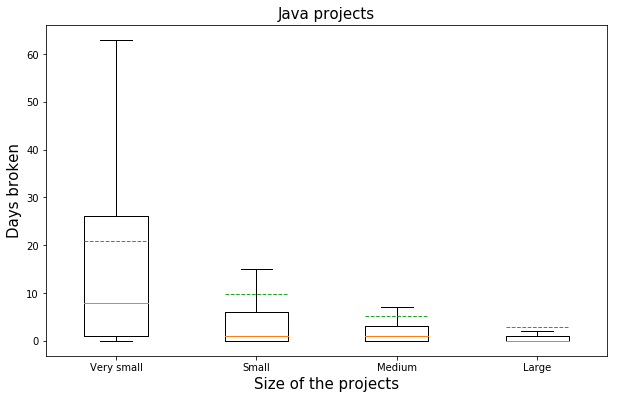

In [11]:
###### plot bar #######
data = [very_small, small, medium, large]




fig, ax = plt.subplots()

fig.subplots_adjust(left=0.08, right=1.38, bottom=0.05, top=1.2, hspace=0.4, wspace=0.3)
#fig.subplots_adjust(left=0.15, right=.98, bottom=0.22, top=.9, hspace=0.6, wspace=0.6)

ax.set_title('Java projects', fontsize=15)
ax.set_xlabel('Size of the projects', fontsize=15)
ax.set_ylabel('Days broken', fontsize=15)

ax.set_axisbelow(True)


ax.boxplot(data, 0, '', showmeans=True, meanline=True, labels=['Very small','Small', 'Medium', 'Large']) # boxplot sem outlier points


#plt.savefig('days_broken_java.eps', format='eps', dpi = 300,  bbox_inches='tight')
plt.show()

# RQ4

In [47]:
df = dataset

In [48]:
print(f'Quantidade de dados da duração da build: {len(df.tr_log_buildduration)}')

Quantidade de dados da duração da build: 370268


In [49]:
df = df.dropna(subset=['tr_log_buildduration'])
df = df.sort_values(by='tr_log_buildduration', ascending=False)

In [50]:
print(f'Apos remoção de NaN: {len(df.tr_log_buildduration)}')

Apos remoção de NaN: 55044


In [52]:
df.tr_log_buildduration.describe()

count    55044.000000
mean       259.569673
std        446.586864
min          0.000000
25%         22.000000
50%         86.000000
75%        282.250000
max       3589.000000
Name: tr_log_buildduration, dtype: float64

### Quantidade de build menos de 10 minutos e com mais de 10 minutos

In [33]:
list_time_build = df.tr_log_buildduration.tolist()
build_10 = 0
build_long = 0


for i in list_time_build:
    if(i <= 600):
        build_10+=1
    else:
        build_long+=1
        

print(f'Build com 10 min ou menos: {build_10}')
print(f'Build com mais de 10 min: {build_long}')

Build com 10 min ou menos: 47998
Build com mais de 10 min: 7046


### Very small, small, medium, large and very large

In [52]:
def size_pro(sett):
    if(sett == 1): #abaixo de 1000 linhas
        df1 = dataset.loc[(dataset['gh_sloc'] < 1000)]  
        return(df1)
    if(sett == 2): #acima de 1000 e menos que 10.000
        df2 = dataset.loc[(dataset['gh_sloc'] < 10000)]
        df2 = df2.loc[(df2['gh_sloc'] > 1000) ]
        return(df2)
    
    if(sett == 3): #acima de 10.000 linhas e menos que 100.000
        df3 = dataset.loc[(dataset['gh_sloc'] < 100000)]
        df3 = df3.loc[(df3['gh_sloc'] > 10000) ]
        return(df3)
    
    if(sett == 4): #acima de 100.000 linhas
        df4 = dataset.loc[dataset['gh_sloc'] > 100000]
        df4 = df4.loc[(df4['gh_sloc'] < 1000000)]
        return(df4)
    
    if(sett == 5):
        df5 = dataset.loc[dataset['gh_sloc'] > 1000000]
        return(df5)

In [53]:
very_small = size_pro(1)
small = size_pro(2)
medium = size_pro(3)
large = size_pro(4)
very_large = size_pro(5)

In [54]:
print(f'\nProjetos very small: \n{very_small.tr_log_buildduration.describe()} \nmediana: {very_small.tr_log_buildduration.median()}')

print(f'\nProjetos small: \n{small.tr_log_buildduration.describe()}  \nmediana: {small.tr_log_buildduration.median()}')

print(f'\nProjetos medium: \n{medium.tr_log_buildduration.describe()}  \nmediana: {medium.tr_log_buildduration.median()}')

print(f'\nProjetos large: \n{large.tr_log_buildduration.describe()}  \nmediana: {large.tr_log_buildduration.median()}' )

print(f'\nProjetos very large: \n{very_large.tr_log_buildduration.describe()}  \nmediana: {very_large.tr_log_buildduration.median()}')


Projetos very small: 
count     783.000000
mean      229.967420
std       379.749396
min         0.000000
25%         0.000000
50%        11.720000
75%       322.500000
max      1930.000000
Name: tr_log_buildduration, dtype: float64 
mediana: 11.72

Projetos small: 
count    13564.000000
mean       106.934060
std        162.182862
min          0.000000
25%         13.000000
50%         41.000000
75%        148.000000
max       2314.000000
Name: tr_log_buildduration, dtype: float64  
mediana: 41.0

Projetos medium: 
count    24290.000000
mean       200.395489
std        297.232611
min          0.000000
25%         19.112500
50%         74.500000
75%        247.000000
max       2703.000000
Name: tr_log_buildduration, dtype: float64  
mediana: 74.5

Projetos large: 
count    16356.000000
mean       474.318475
std        663.369570
min          0.000000
25%         47.000000
50%        198.000000
75%        617.000000
max       3589.000000
Name: tr_log_buildduration, dtype: float64  
medi

In [55]:
def size_pro_lang(language,sett):
    if(sett == 1): #abaixo de 1000 linhas
        df1 = dataset.loc[(dataset['gh_sloc'] < 1000) & (dataset['gh_lang'] == language)]  
        return(df1)
    if(sett == 2): #acima de 1000 e menos que 10.000
        df2 = dataset.loc[(dataset['gh_sloc'] < 10000)]
        df2 = df2.loc[(df2['gh_sloc'] > 1000) & (df2['gh_lang'] == language)]
        return(df2)
    
    if(sett == 3): #acima de 10.000 linhas e menos que 100.000
        df3 = dataset.loc[(dataset['gh_sloc'] < 100000)]
        df3 = df3.loc[(df3['gh_sloc'] > 10000) & (df3['gh_lang'] == language)]
        return(df3)
    
    if(sett == 4): #acima de 100.000 linhas
        df4 = dataset.loc[dataset['gh_sloc'] > 100000]
        df4 = df4.loc[(df4['gh_sloc'] < 1000000) & (df4['gh_lang'] == language)]
        return(df4)
    if(sett == 5):
        df5 = df.loc[df['gh_sloc'] > 1000000]
        return()

## Java - describe

In [58]:
df_java = df.loc[df['gh_lang'] == 'java']


df_java.tr_log_buildduration.describe()

count    47300.000000
mean       265.856727
std        469.534484
min          0.000000
25%         20.097500
50%         84.000000
75%        271.000000
max       3589.000000
Name: tr_log_buildduration, dtype: float64

### Quantidade de build menos de 10 minutos e com mais de 10 minutos

In [59]:
list_time_build = df_java.tr_log_buildduration.tolist()
build_10 = 0
build_long = 0


for i in list_time_build:
    if(i <= 600):
        build_10+=1
    else:
        build_long+=1
        

print(f'Build com 10 min ou menos: {build_10}')
print(f'Build com mais de 10 min: {build_long}')

Build com 10 min ou menos: 41076
Build com mais de 10 min: 6224


### Projetos java Very small, small, medium, large and very large

In [56]:
very_small = size_pro_lang('java', 1)
small = size_pro_lang('java', 2)
medium = size_pro_lang('java', 3)
large = size_pro_lang('java', 4)
very_large = size_pro_lang('java', 5)

In [ ]:
print(f'\nProjetos very small: \n{very_small.tr_log_buildduration.describe()} \nmediana: {very_small.tr_log_buildduration.median()}')

print(f'\nProjetos small: \n{small.tr_log_buildduration.describe()}  \nmediana: {small.tr_log_buildduration.median()}')

print(f'\nProjetos medium: \n{medium.tr_log_buildduration.describe()}  \nmediana: {medium.tr_log_buildduration.median()}')

print(f'\nProjetos large: \n{large.tr_log_buildduration.describe()}  \nmediana: {large.tr_log_buildduration.median()}' )

print(f'\nProjetos very large: \n{very_large.tr_log_buildduration.describe()}  \nmediana: {very_large.tr_log_buildduration.median()}')

## Ruby - describe

In [61]:
df_ruby = df.loc[df['gh_lang'] == 'ruby']


df_ruby.tr_log_buildduration.describe()

count    7744.000000
mean      221.168632
std       263.304175
min         0.000000
25%        37.562500
50%       107.500000
75%       343.000000
max      2373.000000
Name: tr_log_buildduration, dtype: float64

### Quantidade de build menos de 10 minutos e com mais de 10 minutos

In [62]:
list_time_build = df_ruby.tr_log_buildduration.tolist()
build_10 = 0
build_long = 0


for i in list_time_build:
    if(i <= 600):
        build_10+=1
    else:
        build_long+=1
        

print(f'Build com 10 min ou menos: {build_10}')
print(f'Build com mais de 10 min: {build_long}')

Build com 10 min ou menos: 6922
Build com mais de 10 min: 822


### Projetos ruby Very small, small, medium, large e very large

In [63]:
very_small = size_pro_lang('ruby', 1)
small = size_pro_lang('ruby', 2)
medium = size_pro_lang('ruby', 3)
large = size_pro_lang('ruby', 4)
very_large = size_pro_lang('ruby', 5)

In [ ]:
print(f'\nProjetos very small: \n{very_small.tr_log_buildduration.describe()} \nmediana: {very_small.tr_log_buildduration.median()}')

print(f'\nProjetos small: \n{small.tr_log_buildduration.describe()}  \nmediana: {small.tr_log_buildduration.median()}')

print(f'\nProjetos medium: \n{medium.tr_log_buildduration.describe()}  \nmediana: {medium.tr_log_buildduration.median()}')

print(f'\nProjetos large: \n{large.tr_log_buildduration.describe()}  \nmediana: {large.tr_log_buildduration.median()}' )

print(f'\nProjetos very large: \n{very_large.tr_log_buildduration.describe()}  \nmediana: {very_large.tr_log_buildduration.median()}')